In [1]:
import numpy as np
from pandas_datareader import data as wb
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
crypto=['BTC-USD','ETH-USD','XRP-USD','LTC-USD','DOGE-USD']
mydata=pd.DataFrame()
for t in crypto:
    mydata[t]=wb.DataReader(t,data_source='yahoo',start='2019-1-1')['Adj Close']

In [3]:
mydata.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 829 entries, 2018-12-31 to 2021-04-11
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   BTC-USD   829 non-null    float64
 1   ETH-USD   829 non-null    float64
 2   XRP-USD   829 non-null    float64
 3   LTC-USD   829 non-null    float64
 4   DOGE-USD  829 non-null    float64
dtypes: float64(5)
memory usage: 38.9 KB


In [4]:
mydata.head()

,BTC-USD,ETH-USD,XRP-USD,LTC-USD,DOGE-USD
Date,,,,,
2018-12-31,3742.700439,133.368256,0.352706,30.468224,0.002346
2019-01-01,3843.520020,140.819412,0.364771,31.979931,0.002392
2019-01-02,3943.409424,155.047684,0.375243,33.433681,0.002407
2019-01-03,3836.741211,149.135010,0.360224,32.026699,0.002360
2019-01-04,3857.717529,154.581940,0.356747,32.404167,0.002315


In [5]:
mydata.tail()

,BTC-USD,ETH-USD,XRP-USD,LTC-USD,DOGE-USD
Date,,,,,
2021-04-06,56048.937500,1971.077271,0.917576,219.423676,0.059028
2021-04-07,58323.953125,2088.573730,1.052756,227.003021,0.061464
2021-04-08,58245.003906,2072.108887,1.020837,221.862366,0.061684
2021-04-09,59793.234375,2135.942139,1.374416,255.620193,0.063845
2021-04-11,59717.394531,2124.816406,1.423917,258.647675,0.065434


In [6]:
mydata.iloc[0]

BTC-USD     3742.700439
ETH-USD      133.368256
XRP-USD        0.352706
LTC-USD       30.468224
DOGE-USD       0.002346
Name: 2018-12-31 00:00:00, dtype: float64

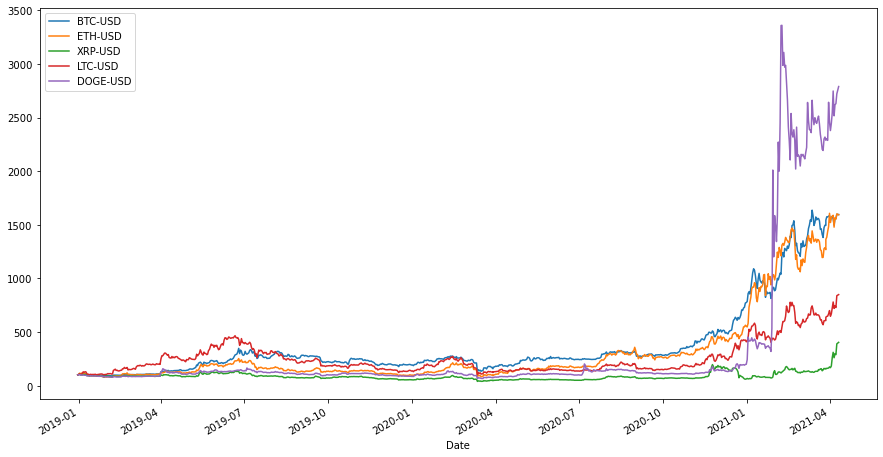

In [7]:
(mydata/mydata.iloc[0]*100).plot(figsize=(15,8));
plt.show()

In [8]:
returns=(mydata/mydata.shift(1))-1
weights=np.array([0.20, 0.20, 0.20, 0.20, 0.20])

In [9]:
annual_returns=returns.mean()*250
np.dot(annual_returns, weights)

1.182787014289942

In [10]:
pfoloio_return=str(round(np.dot(annual_returns, weights),5)*100)+'%'
print (pfoloio_return)

118.279%


In [11]:
Bitcoin = wb.DataReader('BTC-USD',data_source='yahoo',start='2019-1-1')
Bitcoin.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-31,3868.742920,3725.867432,3866.839111,3742.700439,4.661841e+09,3742.700439
2019-01-01,3850.913818,3707.231201,3746.713379,3843.520020,4.324201e+09,3843.520020
2019-01-02,3947.981201,3817.409424,3849.216309,3943.409424,5.244857e+09,3943.409424
2019-01-03,3935.685059,3826.222900,3931.048584,3836.741211,4.530215e+09,3836.741211
2019-01-04,3865.934570,3783.853760,3832.040039,3857.717529,4.847965e+09,3857.717529


In [12]:
Bitcoin.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-04-06,58731.144531,55604.023438,58186.507812,56048.937500,7.564530e+10,56048.937500
2021-04-07,58338.738281,55879.085938,56099.914062,58323.953125,5.305386e+10,58323.953125
2021-04-08,58937.046875,57807.863281,58326.562500,58245.003906,4.665521e+10,58245.003906
2021-04-09,61276.664062,58038.707031,58253.777344,59793.234375,5.823847e+10,59793.234375
2021-04-11,60741.066406,59612.167969,60237.496094,59612.167969,5.240373e+10,59612.167969


In [13]:
Bitcoin['simple_return'] = (Bitcoin['Adj Close']/Bitcoin['Adj Close'].shift(1))-1
print (Bitcoin['simple_return'])

Date
2018-12-31         NaN
2019-01-01    0.026938
2019-01-02    0.025989
2019-01-03   -0.027050
2019-01-04    0.005467
                ...   
2021-04-06   -0.036833
2021-04-07    0.040590
2021-04-08   -0.001354
2021-04-09    0.026581
2021-04-11   -0.003028
Name: simple_return, Length: 829, dtype: float64


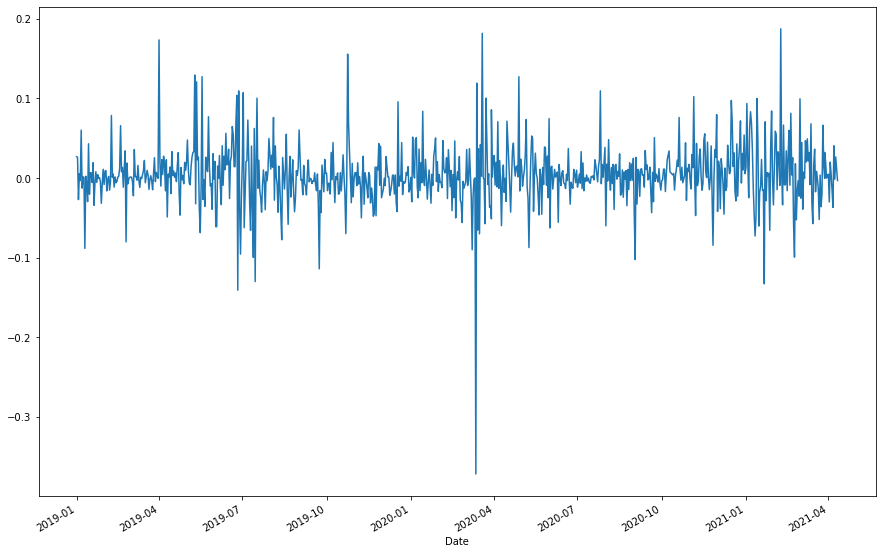

In [14]:
Bitcoin['simple_return'].plot(figsize=(15,10))
plt.show()

In [15]:
avg_returns_daily=Bitcoin['simple_return'].mean()
avg_returns_daily

0.00409087250136638

In [16]:
print(str(round(avg_returns_daily,5)*100)+'%')

0.409%


In [17]:
avg_returns_annualy=Bitcoin['simple_return'].mean() * 250
avg_returns_annualy

1.022718125341595

In [18]:
print(str(round(avg_returns_annualy,5)*100)+'%')

102.272%


In [19]:
Ethereum = wb.DataReader('ETH-USD',data_source='yahoo',start='2019-1-1')
Ethereum.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-31,140.181152,132.519394,140.031067,133.368256,2.358360e+09,133.368256
2019-01-01,141.397507,132.650711,133.418152,140.819412,2.258710e+09,140.819412
2019-01-02,156.929138,140.650955,141.519516,155.047684,3.328240e+09,155.047684
2019-01-03,155.863052,147.198364,155.196045,149.135010,2.676165e+09,149.135010
2019-01-04,156.878983,147.907104,148.912888,154.581940,3.126193e+09,154.581940


In [20]:
Ethereum.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-04-06,2133.187500,1945.442139,2117.728516,1971.077271,3.611627e+10,1971.077271
2021-04-07,2091.516357,1959.079468,1969.133179,2088.573730,2.531296e+10,2088.573730
2021-04-08,2102.873779,2055.163330,2088.772217,2072.108887,1.981247e+10,2072.108887
2021-04-09,2196.996338,2062.787598,2071.111572,2135.942139,2.498624e+10,2135.942139
2021-04-11,2160.050293,2123.290771,2160.050293,2124.117920,2.172826e+10,2124.117920


In [21]:
Ethereum['simple_return'] = (Ethereum['Adj Close']/Ethereum['Adj Close'].shift(1))-1
print (Ethereum['simple_return'])

Date
2018-12-31         NaN
2019-01-01    0.055869
2019-01-02    0.101039
2019-01-03   -0.038135
2019-01-04    0.036523
                ...   
2021-04-06   -0.069535
2021-04-07    0.059610
2021-04-08   -0.007883
2021-04-09    0.030806
2021-04-11   -0.005536
Name: simple_return, Length: 829, dtype: float64


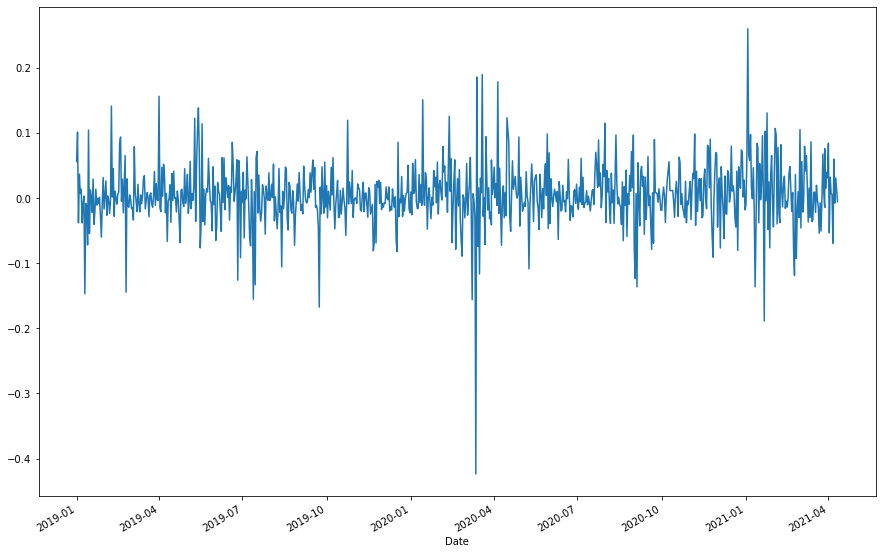

In [22]:
Ethereum['simple_return'].plot(figsize=(15,10))
plt.show()

In [23]:
avg_returns_daily_ETH=Ethereum['simple_return'].mean()
avg_returns_daily_ETH

0.0045227207326296575

In [24]:
print(str(round(avg_returns_daily_ETH,5)*100)+'%')

0.45199999999999996%


In [25]:
avg_returns_annualy_ETH=Ethereum['simple_return'].mean() * 250
avg_returns_annualy_ETH

1.1306801831574145

In [26]:
print(str(round(avg_returns_annualy_ETH,5)*100)+'%')

113.06799999999998%


In [27]:
Ripple = wb.DataReader('XRP-USD',data_source='yahoo',start='2019-1-1')
Ripple.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-31,0.373793,0.350787,0.371051,0.352706,501793515.0,0.352706
2019-01-01,0.364771,0.350402,0.352512,0.364771,449347622.0,0.364771
2019-01-02,0.378021,0.359574,0.365675,0.375243,543216669.0,0.375243
2019-01-03,0.374505,0.357675,0.374505,0.360224,438873803.0,0.360224
2019-01-04,0.364642,0.352785,0.359753,0.356747,450633876.0,0.356747


In [28]:
Ripple.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-04-06,1.104488,0.869414,1.097547,0.917576,2.194217e+10,0.917576
2021-04-07,1.072568,0.905627,0.919055,1.052756,1.288835e+10,1.052756
2021-04-08,1.083159,0.986585,1.053417,1.020837,1.023527e+10,1.020837
2021-04-09,1.389957,1.008636,1.020282,1.374416,2.554779e+10,1.374416
2021-04-11,1.491532,1.361333,1.367611,1.402370,3.132820e+10,1.402370


In [29]:
Ripple['simple_return'] = (Ripple['Adj Close']/Ripple['Adj Close'].shift(1))-1
print (Ripple['simple_return'])

Date
2018-12-31         NaN
2019-01-01    0.034207
2019-01-02    0.028708
2019-01-03   -0.040025
2019-01-04   -0.009652
                ...   
2021-04-06   -0.162999
2021-04-07    0.147323
2021-04-08   -0.030319
2021-04-09    0.346362
2021-04-11    0.020339
Name: simple_return, Length: 829, dtype: float64


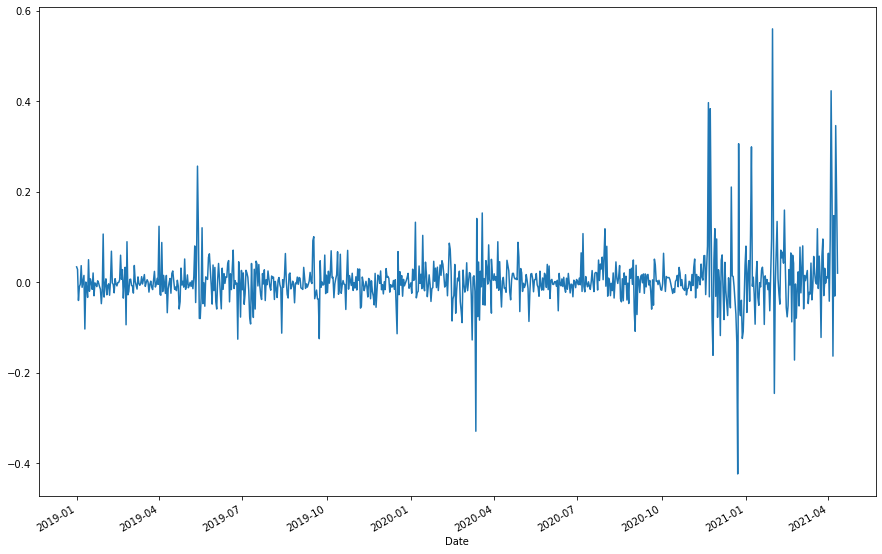

In [30]:
Ripple['simple_return'].plot(figsize=(15,10))
plt.show()

In [31]:
avg_returns_daily_XRP=Ripple['simple_return'].mean()
avg_returns_daily_XRP

0.003388225747849177

In [32]:
print(str(round(avg_returns_daily_XRP,5)*100)+'%')

0.33899999999999997%


In [33]:
avg_returns_annualy_XRP=Ripple['simple_return'].mean() * 250
avg_returns_annualy_XRP

0.8470564369622943

In [34]:
print(str(round(avg_returns_annualy_XRP,5)*100)+'%')

84.706%


In [35]:
Litecoin = wb.DataReader('LTC-USD',data_source='yahoo',start='2019-1-1')
Litecoin.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-31,32.000603,30.164322,31.977234,30.468224,367746437.0,30.468224
2019-01-01,32.097584,30.264280,30.458393,31.979931,379429124.0,31.979931
2019-01-02,33.793324,31.765974,32.021229,33.433681,414331918.0,33.433681
2019-01-03,33.420704,31.592480,33.353573,32.026699,345068249.0,32.026699
2019-01-04,33.023350,31.437557,32.016525,32.404167,391010579.0,32.404167


In [36]:
Litecoin.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-04-06,243.151276,212.226654,237.561569,219.423676,8.711169e+09,219.423676
2021-04-07,228.353668,218.084396,219.846619,227.003021,4.532286e+09,227.003021
2021-04-08,228.967148,220.109406,227.022171,221.862366,3.137325e+09,221.862366
2021-04-09,255.675980,220.200729,221.716019,255.620193,6.686631e+09,255.620193
2021-04-11,263.798401,250.454346,251.091370,256.007141,7.745096e+09,256.007141


In [37]:
Litecoin['simple_return'] = (Litecoin['Adj Close']/Litecoin['Adj Close'].shift(1))-1
print (Litecoin['simple_return'])

Date
2018-12-31         NaN
2019-01-01    0.049616
2019-01-02    0.045458
2019-01-03   -0.042083
2019-01-04    0.011786
                ...   
2021-04-06   -0.076752
2021-04-07    0.034542
2021-04-08   -0.022646
2021-04-09    0.152157
2021-04-11    0.001514
Name: simple_return, Length: 829, dtype: float64


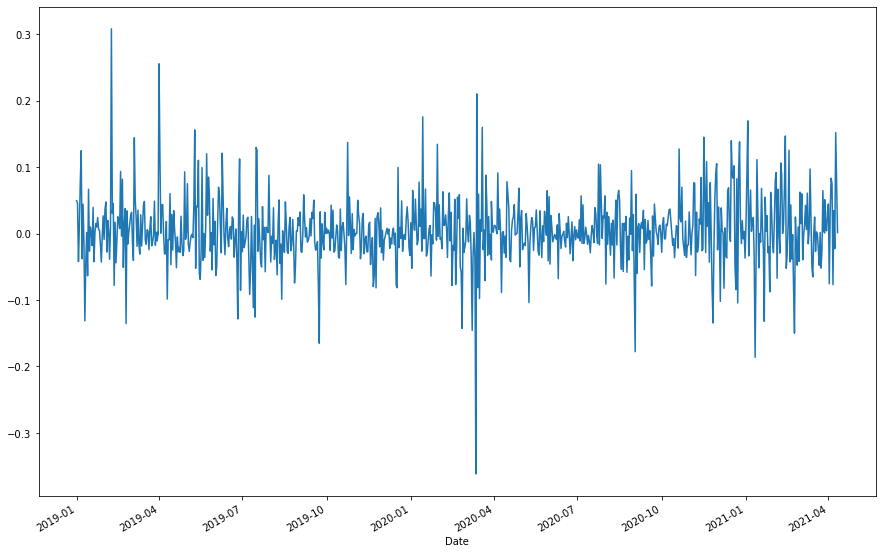

In [38]:
Litecoin['simple_return'].plot(figsize=(15,10))
plt.show()

In [39]:
avg_returns_daily_LTC=Litecoin['simple_return'].mean()
avg_returns_daily_LTC

0.0038954929217480017

In [40]:
print(str(round(avg_returns_daily_LTC,5)*100)+'%')

0.38999999999999996%


In [41]:
avg_returns_annualy_LTC=Litecoin['simple_return'].mean() * 250
avg_returns_annualy_LTC

0.9738732304370005

In [42]:
print(str(round(avg_returns_annualy_LTC,5)*100)+'%')

97.387%


In [43]:
Dogecoin = wb.DataReader('DOGE-USD',data_source='yahoo',start='2019-1-1')
Dogecoin.head()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2018-12-31,0.002395,0.002325,0.002370,0.002346,18724788.0,0.002346
2019-01-01,0.002392,0.002322,0.002346,0.002392,17364744.0,0.002392
2019-01-02,0.002458,0.002372,0.002388,0.002407,18015392.0,0.002407
2019-01-03,0.002414,0.002356,0.002404,0.002360,17619234.0,0.002360
2019-01-04,0.002397,0.002274,0.002364,0.002315,19530100.0,0.002315


In [44]:
Dogecoin.tail()

,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2021-04-06,0.067299,0.057641,0.064454,0.059028,2.857061e+09,0.059028
2021-04-07,0.061745,0.058817,0.059036,0.061464,1.055258e+09,0.061464
2021-04-08,0.063910,0.060296,0.061463,0.061684,1.060466e+09,0.061684
2021-04-09,0.065068,0.060818,0.061591,0.063845,1.369793e+09,0.063845
2021-04-11,0.067571,0.063259,0.066836,0.065149,2.269500e+09,0.065149


In [45]:
Dogecoin['simple_return'] = (Dogecoin['Adj Close']/Dogecoin['Adj Close'].shift(1))-1
print (Dogecoin['simple_return'])

Date
2018-12-31         NaN
2019-01-01    0.019608
2019-01-02    0.006271
2019-01-03   -0.019526
2019-01-04   -0.019068
                ...   
2021-04-06   -0.084241
2021-04-07    0.041269
2021-04-08    0.003579
2021-04-09    0.035033
2021-04-11    0.020422
Name: simple_return, Length: 829, dtype: float64


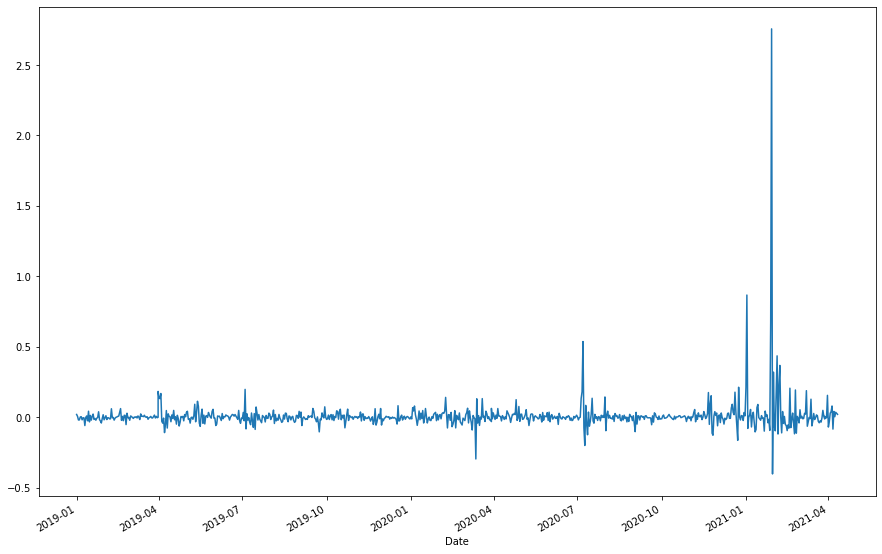

In [46]:
Dogecoin['simple_return'].plot(figsize=(15,10))
plt.show()

In [47]:
avg_returns_daily_DOGE=Dogecoin['simple_return'].mean()
avg_returns_daily_DOGE

0.007719109920572657

In [48]:
print(str(round(avg_returns_daily_DOGE,5)*100)+'%')

0.772%


In [49]:
avg_returns_annualy_DOGE=Dogecoin['simple_return'].mean() * 250
avg_returns_annualy_DOGE

1.9297774801431642

In [50]:
print(str(round(avg_returns_annualy_DOGE,5)*100)+'%')

192.978%
